Auteur : Jimmy Lauzer 

Tâche 8

Ce notebook permet de télécharger la structure de bandes électroniques du matériau qui m'a été attribué (CaGe2) et d'en tirer plusieurs informations. A savoir, la détermination de la bande interdite et le calcul de la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique. 

En théorie, il devrait également permettre de trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion. J'explique tout de même une méthode possible. 

Voici le graphe des bandes électroniques du matériau CaGe2


<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

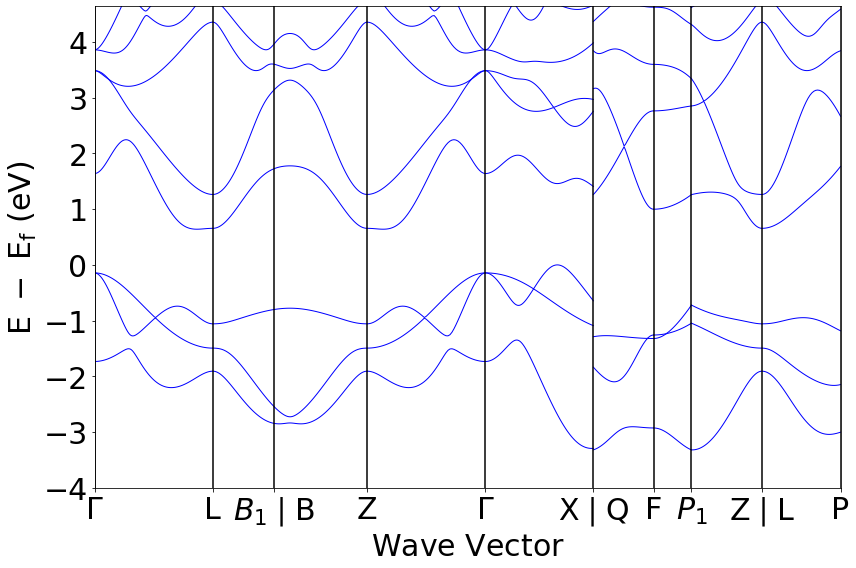

In [106]:
from pymatgen.io.cif import CifWriter #différents import nécessaires
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy
from matplotlib import pyplot
with MPRester("ZsX7S4MaIQIVbxyXjs") as m :
    struct = m.get_bandstructure_by_material_id("mp-567456") #récuperation de la structure de bandes 

#Graphe des bandes électroniques de mon matériau
print('Voici le graphe des bandes électroniques du matériau CaGe2')
plotter = BSPlotter(struct)
plotter.get_plot()

In [107]:
#Section relative à la détermination de la bande interdite 

bandGap = struct.get_band_gap() #récupération de l'objet contenant les informations sur la bande interdite

print('Informations à propos de la bande interdite')
print('\n')
print('Energie de la bande interdite =', bandGap.get('energy'), 'eV')
print('Bande interdite directe ?', bandGap.get('direct'))
print('Bande interdite métallique?', plotter.bs_plot_data().get("is_metal"))
print('Transition de la bande interdite :', bandGap.get('transition'))
print('Energie de fermi =', struct.efermi, 'eV')

Informations à propos de la bande interdite


Energie de la bande interdite = 0.6408000000000005 eV
Bande interdite directe ? False
Bande interdite métallique? False
Transition de la bande interdite : (0.232,0.000,-0.232)-(0.430,0.000,0.000)
Energie de fermi = 3.97947136 eV


In [108]:
#Section relative à la description de la méthode pour obtenir la direction dans laquelle la dernière (première) 
#bande de valence (conduction) présente le plus et le moins de dispersion. 

vbm = struct.get_vbm() # récupération des objets vbm (valence band maximum) et cbm (conduction band minimum)
cbm = struct.get_cbm() 

data = plotter.bs_plot_data() #données à propos du graphe des bandes électroniques 
energy = data.get('energy') #récupération des énergies 
ticks = data.get('ticks') #récupération des distances 
dist = ticks.get('distance')

Une fois que la cbm et la vbm seront identifiés sur le graphe, la plus grande (petite) dispersion pour l'un ou l'autre correspondra à la plus grande (petite) pente entre 2 k-points (vecteurs d'onde remarquables d'où sont issues les barres vecticales sur le graphe) et de les marquer d'une flèche sur le graphe à l'aide de matplotlib. La pente représente donc un delta d'énergie et est calculable classiquement (dy/dx) à l'aide des énergies et des distances.

Seulement, j'ai rencontré des difficultés à identifier ma cbm et ma vbm sur le dessin ou dans la data disponible grâce à la fonction BSPlotter.bs_plot.data(). D'une part, le graphe fourni par Materials Project n'est pas le même que celui plotté par BSPlotter (capture d'écran ci-dessous) donc je n'ai pas su m'aider du "interactive plot". D'autre part, j'ai cherché manuellement la valeur maximale (minimale) de ma vbm (cbm) à l'aide du calcul suivant 
                       
                       vbm.get('energy')-struct.efermi
                       
dans les différentes entrées du tableau energy avec print(energy[0].get('1')) par exemple (chaque entrée correspondant à un intervalle entre 2 k-point mais malheureusement aucune ne matchait). 

Voici le graphe de bandes électroniques présent sur Materials Project.

<p><img src=bands.PNG></p>

In [109]:
#section relative aux calculs de masse effective

print('Calcul d une masse effective en supposant une dispersion parabolique')
print('\n')

#description de la méthode

print('La condition de dispersion parabolique permet d utiliser l équation : E = (hbar² k²)/2m')
print('En isolant la masse dans la formule et en récupérant les valeurs d énergies et de vecteurs d onde grâce aux objets cbm et vbm, nous pouvons aisément calculer la masse effective.')
print('\n')

#application de la méthode 

hbar = 6.582119569e-16 #constante h bar [eV*s]
k = numpy.linalg.norm(vbm['kpoint'].cart_coords) #vecteur d'onde [1/angström]

e_vbm = vbm['energy'] #énergies des vbm et cbm [eV]
e_cbm = cbm['energy']

mass_vbm = ((hbar**2) * (k**2)) / (2 * e_vbm) #masses effectives des cbm et vbm dans les conditions souhaitées [kg]
mass_cbm = ((hbar**2) * (k**2)) / (2 * e_cbm)

print('Masse effective au sommet de la dernière bande de valence =', mass_vbm, 'kg')
print('Masse effective à la base de la première bande de conduction =', mass_cbm, 'kg')

Calcul d une masse effective en supposant une dispersion parabolique


La condition de dispersion parabolique permet d utiliser l équation : E = (hbar² k²)/2m
En isolant la masse dans la formule et en récupérant les valeurs d énergies et de vecteurs d onde grâce aux objets cbm et vbm, nous pouvons aisément calculer la masse effective.


Masse effective au sommet de la dernière bande de valence = 1.7610182258194005e-32 kg
Masse effective à la base de la première bande de conduction = 1.5087242535637502e-32 kg
